Here we are going to display some basic functionality of the pychometrics package.

First, lets simulate some data. We are going to have 100 people and 50 items.



In [1]:
from psychometrics.simulation import simulate_items, simulate_people, item_vectors
from psychometrics.CTT import examinee_score
from psychometrics.test_info import test_descriptives
import pandas as pd

items = simulate_items()
people = simulate_people(100, {'mean': 0, 'sd': 1})
prob_vector, response_vector = item_vectors(items, people)


print('Here are the item parameters')
print(pd.DataFrame(items))

print('Here is the Responses')
print(response_vector.head())

print('Here is the Probabilities')
print(prob_vector.head())

Here are the item parameters
    a         b     c
0   1 -1.085631  None
1   1  0.997345  None
2   1  0.282978  None
3   1 -1.506295  None
4   1 -0.578600  None
5   1  1.651437  None
6   1 -2.426679  None
7   1 -0.428913  None
8   1  1.265936  None
9   1 -0.866740  None
10  1 -0.678886  None
11  1 -0.094709  None
12  1  1.491390  None
13  1 -0.638902  None
14  1 -0.443982  None
15  1 -0.434351  None
16  1  2.205930  None
17  1  2.186786  None
18  1  1.004054  None
19  1  0.386186  None
20  1  0.737369  None
21  1  1.490732  None
22  1 -0.935834  None
23  1  1.175829  None
24  1 -1.253881  None
25  1 -0.637752  None
26  1  0.907105  None
27  1 -1.428681  None
28  1 -0.140069  None
29  1 -0.861755  None
30  1 -0.255619  None
31  1 -2.798589  None
32  1 -1.771533  None
33  1 -0.699877  None
34  1  0.927462  None
35  1 -0.173636  None
36  1  0.002846  None
37  1  0.688223  None
38  1 -0.879536  None
39  1  0.283627  None
40  1 -0.805367  None
41  1 -1.727669  None
42  1 -0.390900  None
43 

Now lets compute some basic Classical Test Theory item Statistics

Reliability
P-value
Point Biserial
Reliability without the item

In [2]:
from psychometrics.item_analysis import get_p_values, discrimination_index, alpha_without_item

p_values = get_p_values(response_vector)
point_biserial, biserial = discrimination_index(response_vector)
reliability_wo_item = alpha_without_item(response_vector)

print("P Values")
print(p_values.head(5))

print("point biserial")
print(biserial.head(5))

print("biserial")
print(point_biserial.head(5))

print('alpha without item')
print(reliability_wo_item.head())


3.0696071011
P Values
   P_Value  Item
0     0.33     0
1     0.73     1
2     0.54     2
3     0.18     3
4     0.39     4
point biserial
0    0.481179
1    0.468750
2    0.382471
3    0.394968
4    0.397210
Name: Biserial, dtype: float64
biserial
0    0.440198
1    0.429579
2    0.334516
3    0.358639
4    0.350883
Name: Point Biseral, dtype: float64
alpha without item
0    0.891970
1    0.892160
2    0.893405
3    0.893095
4    0.893164
Name: Alpha Without Item, dtype: float64


A look at Reliability

Alpha
split half
Standard error of measurement


In [3]:
from psychometrics.reliability import calculate_alpha,calculate_split_half, calculate_sem

alpha = calculate_alpha(response_vector)
split_half = calculate_split_half(response_vector)
sem = calculate_sem(response_vector)
print("Alpha is ", alpha)
print("Split half is ", split_half) #todo: Fix this!
print('The SEM is: ', sem)

Alpha is  0.894933894194553
Split half is  (-0.068386840211665592, 0.63700510986142911)
The SEM is:  2.96451496532


Lets grab some basic test information!

In [4]:
from psychometrics.test_info import test_descriptives

descriptives_dict = test_descriptives(response_vector)

print(descriptives_dict)



{'min_score': 4, 'max_score': 44, 'score_sd': 9.1918881673358097, 'score_var': 84.49080808080808, 'average_score': 24.789999999999999, 'median_score': 24.5, 'completed_examinee_count': 100, 'item_count': 50}


Lets try out some IRT. We currently only have the 2pl model working.


In [5]:
from psy import Irt

items = simulate_items()
people = simulate_people(10000, {'mean': 0, 'sd': 1})
prob_vector, response_vector = item_vectors(items, people)

model = Irt(scores=response_vector.values, link='logit', params_type='2PL')
res = model.fit()
print(res)

print("Compare these values to the simulated values:")

print(items)


(array([ 0.95915124,  1.04867698,  1.00087455,  0.98094589,  1.00922278,
        1.06051585,  1.00042868,  0.98686491,  1.02012998,  0.98209307,
        1.06773019,  0.93986759,  0.96073047,  0.94559166,  1.03600469,
        1.00354985,  1.01801597,  1.00873178,  1.04225412,  0.96301956,
        0.97590445,  1.07190144,  1.01895926,  1.01923148,  0.98062445,
        1.02315201,  0.99196969,  0.97474156,  1.02208978,  0.96478591,
        1.01166008,  1.02616308,  1.02775402,  1.04481706,  0.96351658,
        1.00761053,  0.98796098,  0.99664193,  0.95969666,  1.02687405,
        0.96165022,  0.98870153,  0.95315277,  1.04555024,  1.03661435,
        0.9732256 ,  1.02944063,  0.99589188,  1.00018398,  0.99947203]), array([ 0.69423458, -0.82962304, -0.65645655,  0.64100702, -0.16279892,
        1.28880849, -0.69213265,  0.74748377,  0.39030041, -0.12812084,
        1.18292945,  0.65405898, -0.97843876,  0.63685846,  1.37928909,
       -0.14938147, -0.26077853, -0.72683144,  0.02262231,  0

And some Graphics. lets graph the first item.

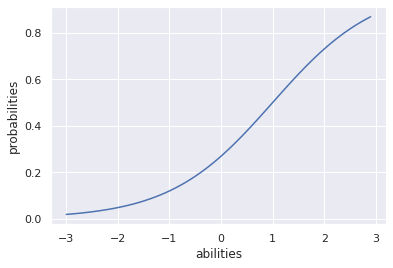

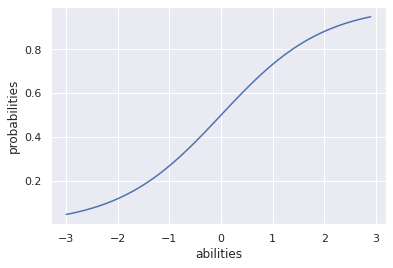

In [6]:
from psychometrics.IRT import plot_2pl

plot_2pl(1,0)



Lets move to standard setting. Lets look at the Angoff, Contrasting groups and IIT methods


{'suggested_cut': 49.049999999999997, 'sem_rater_average': 3.0634040615701421}


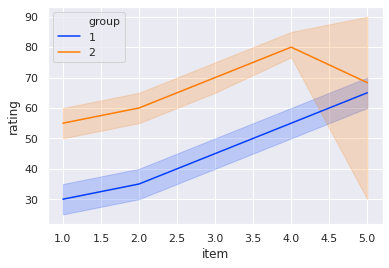

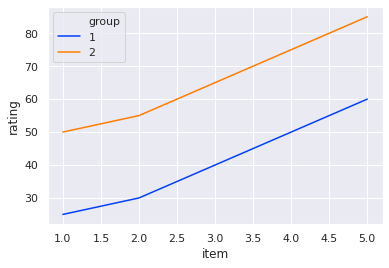

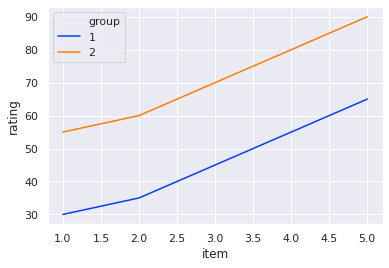

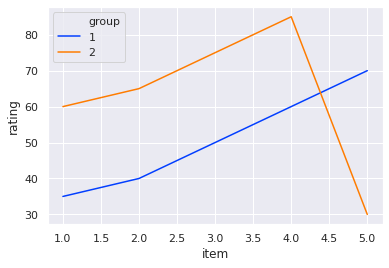

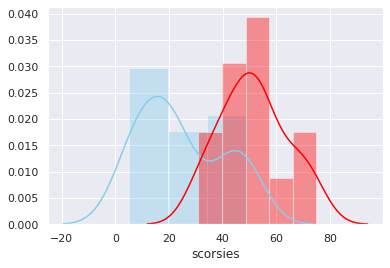

In [7]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from psychometrics.standard_setting import angoff_rating, contrasting_groups, iit

df = pd.read_csv('/home/cfoster/Documents/angoff_ratings.csv')
print(angoff_rating(df))

df = pd.read_csv('/home/cfoster/Documents/iit.csv')
iit(df)
# 
df = pd.read_csv('/home/cfoster/Documents/contrasting_groups.csv')
contrasting_groups(df, score_column='scorsies')
plt.show()

Differential Item Functioning

Currently we only have the Mantel-Hanzel approach.

In [8]:
df = pd.read_csv('/home/cfoster/Documents/dif_CTT.csv')
